# Objectives

* Describe the normal distribution's Empirical Rule
* Calculate $z$-scores from a normal distribution through standardization
* Define the Central Limit Theorem


In [1]:
# Imports!
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

# Normal Distribution

We'll find that the **normal distribution** or **normal curve** or **bell curve** (it has many names) is a very common distribution and it's very useful to us in statistics.

![](images/normal_curve_animation.gif)

## Why a Normal Distribution?

Turns out the normal distribution describes many phenomena. Think of anything that has a typical range:

- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities
- IQ
- heart rate

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

In [3]:
np.linspace(
        stats.norm(mu, sigma).ppf(0.01), # Start plotting here
        stats.norm(mu,sigma).ppf(0.99), # End plotting here
        100)

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

In [4]:
y = stats.norm(mu,sigma).pdf(x)

In [5]:
y

array([0.02665214, 0.0296985 , 0.03302004, 0.03663206, 0.04054955,
       0.04478694, 0.049358  , 0.05427559, 0.05955143, 0.06519596,
       0.07121803, 0.0776247 , 0.08442105, 0.09160987, 0.09919153,
       0.1071637 , 0.11552116, 0.12425566, 0.13335569, 0.14280642,
       0.1525895 , 0.16268307, 0.17306164, 0.18369615, 0.19455396,
       0.20559893, 0.21679157, 0.22808919, 0.23944611, 0.25081392,
       0.26214179, 0.2733768 , 0.28446433, 0.29534848, 0.30597253,
       0.3162794 , 0.32621215, 0.33571453, 0.34473146, 0.35320956,
       0.36109774, 0.3683476 , 0.37491403, 0.38075561, 0.38583507,
       0.39011967, 0.39358159, 0.39619817, 0.39795222, 0.39883215,
       0.39883215, 0.39795222, 0.39619817, 0.39358159, 0.39011967,
       0.38583507, 0.38075561, 0.37491403, 0.3683476 , 0.36109774,
       0.35320956, 0.34473146, 0.33571453, 0.32621215, 0.3162794 ,
       0.30597253, 0.29534848, 0.28446433, 0.2733768 , 0.26214179,
       0.25081392, 0.23944611, 0.22808919, 0.21679157, 0.20559

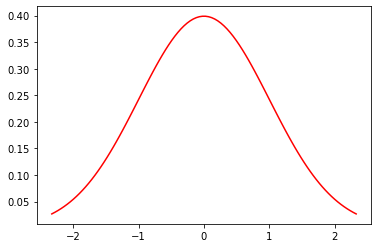

In [2]:
# Visualize it
fig, ax = plt.subplots()

mu = 0
sigma = 1
# This defines the points along the x-axis
x = np.linspace(
        stats.norm(mu, sigma).ppf(0.01), # Start plotting here
        stats.norm(mu,sigma).ppf(0.99), # End plotting here
        100                             # Number of points
)
# The values as at x given by the normal curve (with mu & sigma)
y = stats.norm(mu,sigma).pdf(x)
ax.plot(x, y,'r-');

The Standard Normal Distribution, also known as a Gaussian distribution, is special not only because it shows up EVERYWHERE but also because it's symmetric (mean == median == mode)

### Normal Curve

If you're curious about how we can mathematically define a normal curve, we give this below. (Don't worry, you don't need to recall the mathematical definition).

<details>

$\Large f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x - \mu)^2}{2\sigma^2}}$
    
This might look complicated at first, but it means that the we describe a normal curve with just **two parameters**: $\sigma^2$ (the variance) & $\mu$ (the mean). You may see the notation $N(\mu, \sigma^2)$ which emphasizes there are only two parameters to describe the distribution.
</details>

## *Standard* Normal Distribution

A special normal distribution called the **standard normal distribution** has a mean of 0 and variance of 1. This is also known as a **z distribution**.

Since we know that the shape of a normal distribution changes based on its mean and variance, we'll typically convert or **standardize** our normal distribution to the standard normal distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$\frac{x - \mu}{\sigma}$$

We call this process **standardization**.

![norm_to_z](images/norm_to_z.png)

In [6]:
# Let's transform the normal distribution centered on 5
# with a standard deviation of 2 into a standard normal

# Generating our data
normal_dist = np.random.normal(loc=5, scale=2, size=1000)

np.mean(normal_dist)

5.0170018934263885

In [7]:
normal_dist

array([ 6.07770330e+00,  5.21970907e+00,  6.16544786e+00,  2.85950989e+00,
        7.66834500e+00,  4.46296320e+00,  2.07767838e+00,  2.91925952e+00,
        3.87791900e+00,  5.94281218e+00,  4.48942935e+00,  7.01268590e+00,
        3.27116578e+00,  4.73456145e+00,  4.73596622e+00,  4.15932448e+00,
        4.49147327e+00,  7.36752592e+00,  5.96004371e+00,  3.20028037e+00,
        4.48296155e+00,  5.46477836e+00,  2.65438410e+00,  5.45149324e+00,
        6.14317083e+00,  3.79828820e+00,  4.73542140e+00,  6.46245977e+00,
        3.91157546e+00,  3.04121000e+00,  2.23388455e+00,  4.95500657e+00,
        6.41954801e+00,  5.48994203e+00,  7.88972557e+00,  2.91073929e-01,
        3.97756593e-01,  5.79116066e+00,  3.84767687e+00,  6.43240845e+00,
        5.04878013e+00,  3.22892477e+00,  3.63782401e+00,  7.55571165e+00,
        5.78454740e+00,  4.50321827e+00,  6.26214675e+00,  7.11245385e+00,
        8.11134851e+00,  5.64803498e+00,  2.40233040e+00,  4.51161394e+00,
        4.00143125e+00,  

In [9]:
# Here, let's standardize by hand
# (x - mean) / std
z_dist = [(x-np.mean(normal_dist))/np.std(normal_dist) for x in normal_dist]

np.mean(z_dist)

3.1974423109204506e-17

In [13]:
z_dist

[0.541613159162829,
 0.10350592227630223,
 0.586417108280389,
 -1.101654108901712,
 1.3538233387867542,
 -0.28290209360094093,
 -1.5008713008147945,
 -1.07114487536439,
 -0.5816361546049911,
 0.4727353376254186,
 -0.2693880024868781,
 1.01903204574408,
 -0.8914552277509388,
 -0.14421915445231306,
 -0.14350185591131698,
 -0.43794546712288324,
 -0.26834434209127367,
 1.2002197209712828,
 0.481534066548611,
 -0.9276505891293847,
 -0.2726905760352574,
 0.22864269224297806,
 -1.2063950166618276,
 0.22185907455054876,
 0.5750420549536417,
 -0.6222970690347189,
 -0.14378005115117976,
 0.7380767143311433,
 -0.5644505625300068,
 -1.0088747774800664,
 -1.4211096266309633,
 -0.03165592541475093,
 0.7161652029755583,
 0.24149171777372652,
 1.4668642268088312,
 -2.4131435746176018,
 -2.358669492816687,
 0.39529935246692727,
 -0.5970783278149898,
 0.722731971879445,
 0.016226535035711386,
 -0.9130242455946244,
 -0.7042329625012045,
 1.2963107324528824,
 0.3919225005366992,
 -0.2623471301288503,
 0.6

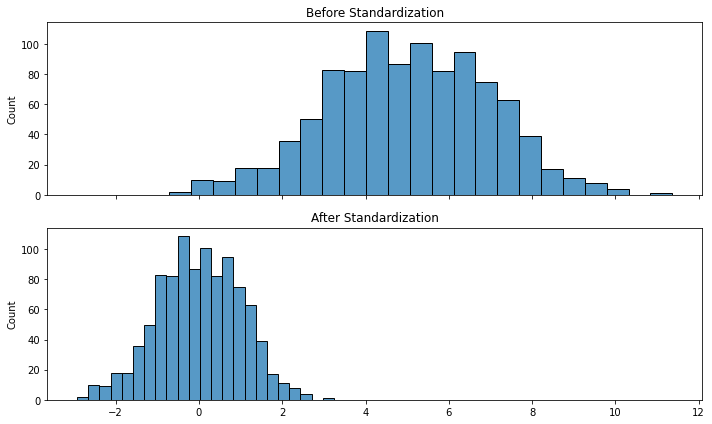

In [10]:
# Visualize it
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))

sns.histplot(data=normal_dist, ax=ax0)
ax0.set_title('Before Standardization')

sns.histplot(data=z_dist, ax=ax1)
ax1.set_title('After Standardization')

plt.tight_layout()

Talking about the **standard normal distribution** can be very convenient since the values correspond to the number of standard deviations above or below the mean.

## $z$-Score

A **$z$-score** for a specific data point $x$ (in a normal distribution) is simply the distance to the mean in the units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

By calculating the z-score of an individual point, we can see how unlikely a value is.

Here's a little site with some [interactive Gaussians](https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php)

#### 🧠 Knowledge Check

What would the $z$-score be for the middle of a normal curve?

- 0


### The Empirical Rule

> Rule states that $68\%$ of the values of a normal distribution of data lie within 1 standard deviation ($\sigma$) of the mean, $95\%$ within $2\sigma$, and $99.7\%$ within $3\sigma$.  

This makes it really quick to look at a normal distribution and understand where values tend to lie

<img src='https://github.com/learn-co-students/dsc-0-09-12-gaussian-distributions-online-ds-ft-031119/blob/master/normalsd.jpg?raw=true' width=700/>

#### 🧠 Knowledge Check

About what percentage of the values would be between a $z$-score of $-1$ and a $z$-score of $2$?

<details>
    <summary>Answer</summary>
    About $82\%$
</details>

# Exercises

The distribution of people's heights in the United States has a **mean of 66 inches** and a **standard deviation of 4 inches**. 

## Height $z$-score

Calculate the z-score of a height of **76 inches.**

In [14]:
# Your code here
(76-66)/(4)

2.5

<details>
    <summary>Answer</summary>
    <code># z-score: z = (x - mu) / std
(76 - 66) / 4</code>
</details>

#### Describe the z-score - what does it tell us?

- a height of 76 inches is 2.5 standard deviations about the mean


## Height Empirical Rule

Determine the proportion of those whose height is between **62 inches and 74 inches**.

In [15]:
# Your code here
x1 = 62
x2 = 74
mean=66
sd = 4
z_score1 = (x1 - mean)/sd
z_score2 = (x2-mean)/sd
print(z_score1, z_score2)

#81.5% of our data between these 2 z-scores

-1.0 2.0


<details>
    <summary>Answer 1</summary>
<code># z-scores for 62" and 74":
z_62 = (62 - 66) / 4
z_74 = (74 - 66) / 4
z_62, z_74</code>
    </details>

<details>
    <summary>Answer 2</summary>
    <code>heights = stats.norm(loc=66, scale=4)
heights.cdf(74) - heights.cdf(62)</code>
    </details>

## Height Percentile

Assuming the above distribution of people's heights in the United States is approximately normal, what percent of people have a height **less than 75 inches**?

In [16]:
# Your code here
heights = stats.norm(66,4)

heights.cdf(75) #tells us what is P(X <= 75)


0.9877755273449553

<details>
    <summary>Answer</summary>
    <code>heights.cdf(75)</code>
    </details>

## Bonus

Assuming the above distribution of people's heights in the United States is approximately normal, what range of heights contain the **middle 50% of values**, also known as the _interquartile range_ (IQR)?

In [17]:
# Your code here
heights.ppf(.25), heights.ppf(.75)

(63.30204099921567, 68.69795900078432)

In [18]:
heights.cdf(63.3024099)

0.2500293079182238

In [19]:
heights.cdf(68.6979)

0.7499953127099267

<details>
    <summary>Answer</summary>
    <code>heights.ppf(0.25), heights.ppf(0.75)</code>
    </details>

## Time for Pandas!

Let's use the same Seattle City Employee data from the first Distributions lecture to check out what scaling looks like in practice!

Data source: https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

In [20]:
# Read in the data
df = pd.read_csv('data/City_of_Seattle_Wage_Data_031422.csv')

In [21]:
# Check it
df.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Seattle Public Utilities,Batchelor,Craig,"Civil Engrng Spec,Sr",53.740
1,Finance & Admin Services,Altice,Jeffrey,Auto Mechanic,39.780
2,Finance & Admin Services,Montes,Valeria,Cust Svc Rep,29.450
3,Fire Department,Kuklok,Rebecca,Cust Svc Rep *,29.450
4,Planning & Comm Development,Quirindongo,Rico,Executive3,97.164


In [22]:
# Rename the columns
df = df.rename(columns = lambda x: x.replace(" ", ""))

In [23]:
# Describe the numeric column
df.describe()

,HourlyRate
count,11739.000000
mean,47.817331
std,16.722128
min,5.530000
25%,35.400000
50%,47.340000
75%,59.550000
max,187.767000


<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

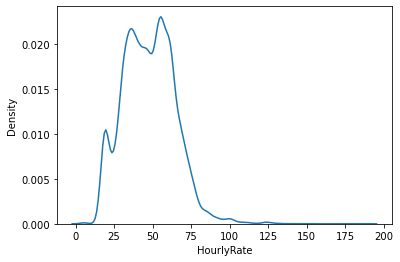

In [24]:
# Plot the hourly rate column
sns.kdeplot(df['HourlyRate'])

How can we describe this distribution?

- Tri-modal?
- Lots of outliers
- Not perfectly normal, but not terrible

### Using Z-Scores

In [25]:
# Grab a sample row
sample_row = df.sample(1)
sample_row

,Department,LastName,FirstName,JobTitle,HourlyRate
11429,Information Technology,Packard,Mary,Info Technol Prof B-BU,67.344


In [28]:
sample_row['HourlyRate'].values[0]

67.344

In [29]:
df['HourlyRate'].mean()

47.81733114404976

In [30]:
df['HourlyRate'].std()

16.722127999840392

In [32]:
# Calculate the z-score for that row's HourlyRate
(sample_row['HourlyRate'].values[0] - df['HourlyRate'].mean()) / df['HourlyRate'].std()

1.1677143516744166

In [33]:
# Standardize the column
mu = df['HourlyRate'].mean()
sigma = df['HourlyRate'].std()
standardized_rate = [(x-mu)/sigma for x in df['HourlyRate']]

In [34]:
standardized_rate

[0.35418152857140983,
 -0.4806404510314999,
 -1.0983847955370913,
 -1.0983847955370913,
 2.950980213548254,
 -1.3298146709714225,
 -1.4601808540326218,
 -1.166557937137902,
 -0.46389617063831823,
 -0.29047326656608063,
 -0.8298782992321442,
 0.35418152857140983,
 -0.6785817656794678,
 -0.29047326656608063,
 -0.5954583737276021,
 0.7244095282649353,
 -1.1850962475732103,
 -1.0601121546383907,
 -0.29047326656608063,
 0.5192322924470566,
 -0.6528673350756533,
 -0.6528673350756533,
 0.8750482508021651,
 -0.32156978729627517,
 0.3368392381641861,
 0.8204499365201121,
 1.1764452978794329,
 -0.6409071347948091,
 -1.4601808540326218,
 0.6513925055503826,
 -0.5284812521548761,
 2.908880308559683,
 -0.6528673350756533,
 -0.5284812521548761,
 -0.9177857712963474,
 0.9635537328804104,
 -1.1235012161268636,
 -1.209016648134898,
 0.7912072468334488,
 0.44603586672829165,
 -0.7951937184176964,
 0.2444466909946663,
 2.4452371645726263,
 -0.5302752821970023,
 -0.2199080849091012,
 1.4909985652656297,
 

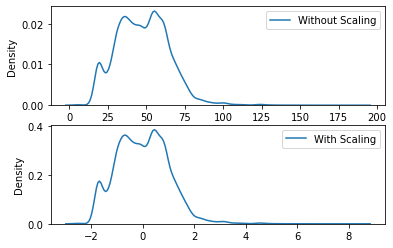

In [35]:
# Visualize it
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False)
# Can toggle sharex to see the impact of the scale

sns.kdeplot(df['HourlyRate'], ax=ax1, label='Without Scaling')
ax1.legend()

sns.kdeplot(standardized_rate, ax=ax2, label='With Scaling')
ax2.legend()

plt.show()

Let's discuss:

- 


## Central Limit Theorem (CLT)

We mentioned that the distribution above doesn't seem very normal. But here's something cool:

> "The central limit theorem states that the sampling distribution of the mean of any independent, random variable will be normal or nearly normal, if the sample size is large enough." 
- From [Stat Trek](https://stattrek.com/statistics/dictionary.aspx?definition=central_limit_theorem)

Let's look at an example, using the popular Iris dataset:

<img src="images/probability-basics.gif" width=800>

Here, taking samples of 15 flowers at a time and measuring their sepal lengths, we see that the the mean of the samples is normally distributed, where the mean of that normal distribution approximates the population mean. 

The coolest part is - this is true and works almost no matter what the original distribution is! (I say 'almost' because there are exceptions, of course). Even when we have _distinctly non-normal distributions_, we can use sampling to get a representation of population parameters (like the population mean).

## Revisiting Sampling

Before we apply a theorem that's related to sampling, we should remember some key things about sampling.

<img src="images/sample_pop.png" alt="sampling example with circled people" width=800>

Our goal when sampling is to find a representative group, from which we can infer population parameters.

Remember: samples have statistics, populations have parameters.

In order to do this effectively, our sample should be randomly selected and representative of our population (which sounds nice and easy, it's hard to do in practice). We are trying to minimize bias in our sample, but also we are sampling because we're trying to minimize cost as well.

### Back to our Seattle Data

Let's take 100 samples of 50 employees each time, and see what their average hourly rate is:

In [43]:
k = 10000 # number of samples
n = 50 # number of employees per sample

# The full for loop version:
# sample_means = []
# for x in range(n):
#     sample_emps = df.sample(n=n)
#     sample_mean = sample_emps['Hourly Rate '].mean()
#     sample_means.append(sample_mean)
    
# But let's do this with list comprehension:
sample_means = [np.mean(df.sample(n=n))[0] for x in range(k)]

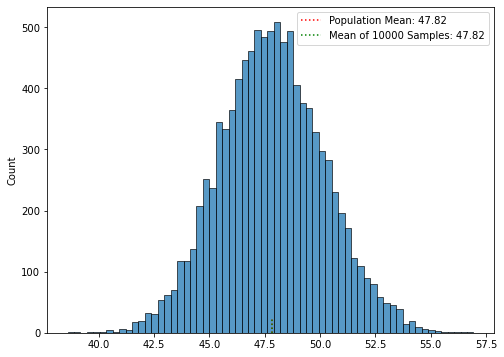

In [44]:
# Plotting the distribution of our samples, plus our pop and sample means
pop_mean = df['HourlyRate'].mean()
samp_mean = np.mean(sample_means)

plt.figure(figsize=(8,6))

sns.histplot(sample_means)

plt.vlines(pop_mean, ymin=0, ymax=25, color='r', linestyle=':',
           label=f'Population Mean: {pop_mean:.2f}')
plt.vlines(samp_mean, ymin=0, ymax=25, color='g', linestyle=':',
           label=f'Mean of {k} Samples: {samp_mean:.2f}')

plt.legend();

Discuss:

- 


-----


# Level Up: Other Distributions

The world is full of distributions to explore! See some other less-common ones below:

![](images/distributions.png)

Now that we know a few methods in visualizing distributions 📊👀, we can start looking at different types of distributions.

We can tell a lot about a distribution shape such as taking a guess of the mechanism that it took to generate the data.

## Distribution Types Exercise

What type of distribution would you expect to best describe the following datasets?

1. Survey responses about whether people voted
2. Rolls on a six-sided die
3. Numbers of defects in shipments of toys
4. Output from a random number generator
5. Measurements of palm tree heights

**Your answers**

1. 
2. 
3. 
4. 
5. 

## Level Up: SKLearn's Standard Scaler

Soon we'll be using a pre-built function to scale our data: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Let's go ahead and peek at our first `sklearn` class!

In [ ]:
# Importing StandardScaler from the preprocessing module
from sklearn.preprocessing import StandardScaler

# Need to instantiate our scaler
scaler = StandardScaler()

# Fitting our scaler (note how we need to make the column into a dataframe)
scaler.fit(df[['HourlyRate']])

# Grabbing the transformed values out as scaled_rate
scaled_rate = scaler.transform(df[['HourlyRate']])

In [ ]:
# Plot and compare results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,6))

sns.kdeplot(df['HourlyRate'], ax=ax1, label='Without Scaling')
ax1.legend()

sns.kdeplot(standardized_rate, ax=ax2, label='Manual Scaling')
ax2.legend()

sns.kdeplot(scaled_rate[:,0], ax=ax3, label='SKLearn Standard Scaling')
ax3.legend()

plt.show()